### QUADRANT PLOTS

Compatibe data (from Timesh): final_data/20240620/VIGO17_NS089008_QPD_0750_20_AS_011_CC

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/20240620_132914_Run1_VIGO17_NS089008_QPD_0750_20_AS_011_CC_AmplitudeUniformity.png


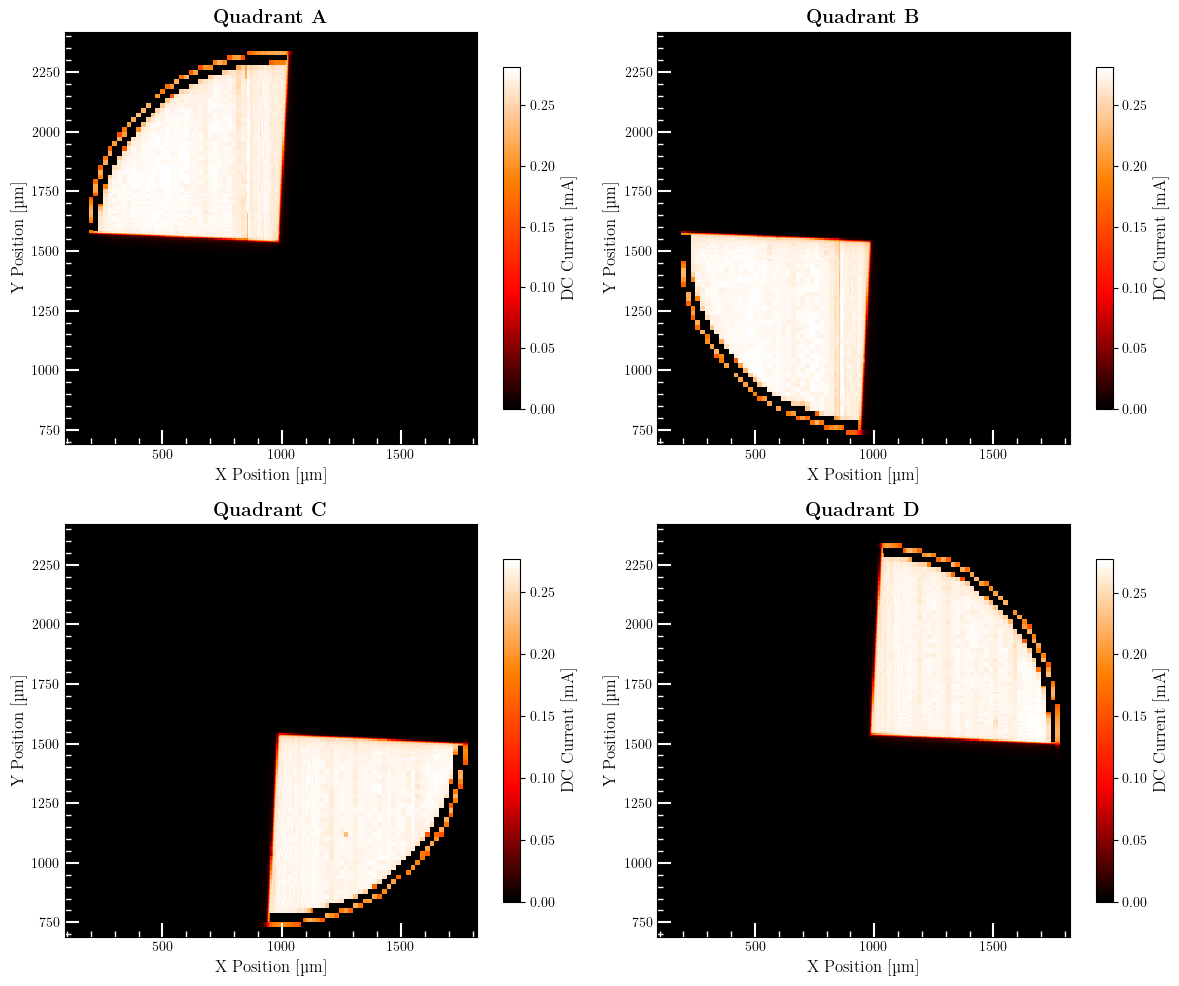

All plots generated and saved successfully.


In [1]:
import pickle
import numpy as np
import os
import glob
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors

font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"  
cmu_serif = fm.FontProperties(fname=font_path)
# Ensure LaTeX is in the PATH (done also in shell config) and enable rendering
os.environ['PATH'] += ':/usr/local/texlive/2024/bin/universal-darwin'
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']  

# Data and figure directories
data_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620"
fig_dir = os.path.join(data_dir, "fig")

# Load .pkl files
file_list = sorted(glob.glob(os.path.join(data_dir, "*.pkl")))

def load_data(file_path):
    with open(file_path, "rb") as file:
        data = pickle.load(file)
    return data.get('rawdata', None)

# Custom colormap
colors = [(0, 0, 0), (1, 0, 0), (1, 0.5, 0), (1, 1, 1)]  # Black -> Red -> Orange -> White
cm = mcolors.LinearSegmentedColormap.from_list("black_red_white", colors, N=100)

def plot_quadrant(ax, x, y, data, title, cm):
    c = ax.pcolormesh(x, y, data, shading='auto', cmap=cm, vmin=0, vmax=np.max(data))
    ax.set_title(rf"\textbf{{{title}}}", fontsize=14) 
    ax.set_xlabel(r"X Position [\textmu{}m]", fontsize=12)
    ax.set_ylabel(r"Y Position [\textmu{}m]", fontsize=12)  
    ax.set_aspect('equal')
    
    x_min, x_max = np.min(x), np.max(x)
    x_ticks = np.arange(max(500, x_min), x_max + 1, 500)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels([f"{int(tick)}" for tick in x_ticks])
    
    y_min, y_max = np.min(y), np.max(y)
    y_ticks = np.arange(max(750, y_min), y_max + 1, 250)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])
    
    ax.tick_params(which='major', direction='in', top=False, right=False, color='white', labelcolor='black', length=10, width=1.5) 
    ax.tick_params(which='minor', direction='in', top=False, right=False, color='white', labelcolor='black', length=4, width=1) 
    ax.minorticks_on()
    ax.grid(False)
    
    cbar = plt.colorbar(c, ax=ax, shrink=0.8)
    cbar.set_label(r"DC Current [mA]", fontsize=12)
    cbar.set_ticks(np.arange(0, 0.26, 0.05))

for file_path in file_list:
    rawdata = load_data(file_path)
    if rawdata is None:
        print(f"Skipping {file_path}, no 'rawdata' found.")
        continue
    
    x_positions = np.array(rawdata['stage_laser_xposition'])
    y_positions = np.array(rawdata['stage_laser_yposition'])
    grid_shape = (len(np.unique(x_positions)), len(np.unique(y_positions)))
    
    try:
        dccurr_A = np.array(rawdata['quadA']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_B = np.array(rawdata['quadB']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_C = np.array(rawdata['quadC']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
        dccurr_D = np.array(rawdata['quadD']['dmm00_curr_amp']).mean(axis=2).flatten().reshape(grid_shape) * 1000
    except ValueError:
        print(f"Skipping {file_path} due to unexpected data shape.")
        continue

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    plot_quadrant(axes[0, 0], x_positions, y_positions, dccurr_A, "Quadrant A", cm)
    plot_quadrant(axes[0, 1], x_positions, y_positions, dccurr_B, "Quadrant B", cm)
    plot_quadrant(axes[1, 0], x_positions, y_positions, dccurr_C, "Quadrant C", cm)
    plot_quadrant(axes[1, 1], x_positions, y_positions, dccurr_D, "Quadrant D", cm)
    
    filename = os.path.basename(file_path).replace(".pkl", ".png")
    save_path = os.path.join(fig_dir, filename)
    plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white') 
    print(f"Saved: {save_path}")
    plt.tight_layout()
    plt.show()
    plt.close()

print("All plots generated and saved successfully.")

### COMBINED QUADRANTS

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/combined_quadrants.png and /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/combined_quadrants.pdf


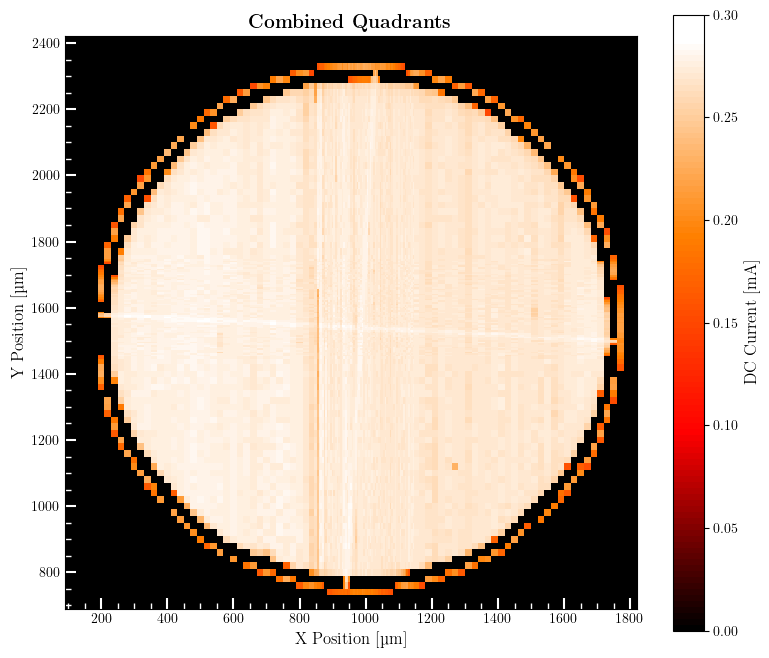

In [2]:
# Sum the current values from all quadrants
combined_current = dccurr_A + dccurr_B + dccurr_C + dccurr_D

# Create a single plot for the combined data
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the combined data
c = ax.pcolormesh(x_positions, y_positions, combined_current, shading='auto', cmap=cm, vmin=0, vmax=np.max(combined_current))
title = "Combined Quadrants"
ax.set_title(rf"\textbf{{{title}}}", fontsize=14) 
ax.set_xlabel(rf"X Position [µm]", fontsize=12)
ax.set_ylabel("Y Position [µm]", fontsize=12)

ax.set_aspect('equal')  

x_min, x_max = np.min(x_positions), np.max(x_positions)
x_ticks = np.arange(max(200, x_min), x_max + 1, 200) 
ax.set_xticks(x_ticks)
ax.set_xticklabels([f"{int(tick)}" for tick in x_ticks])
y_min, y_max = np.min(y_positions), np.max(y_positions)
y_ticks = np.arange(max(800, y_min), y_max + 1, 200) 
ax.set_yticks(y_ticks)
ax.set_yticklabels([f"{int(tick)}" for tick in y_ticks])
ax.tick_params(which='major', direction='in', top=False, right=False, color='white', labelcolor='black', length=8, width=1.5)
ax.tick_params(which='minor', direction='in', top=False, right=False, color='white', labelcolor='black', length=4, width=1)
ax.minorticks_on()
ax.grid(False)

cbar = plt.colorbar(c, ax=ax, shrink=0.8)
cbar.set_label("DC Current [mA]", fontsize=12)
cbar.set_ticks(np.arange(0, np.ceil(np.max(combined_current) * 1.1 / 0.05) * 0.05, 0.05))

filename_base = os.path.join(fig_dir, "combined_quadrants")
plt.savefig(f"{filename_base}.png", dpi=300, bbox_inches='tight', facecolor='white')
plt.savefig(f"{filename_base}.pdf", dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {filename_base}.png and {filename_base}.pdf")

plt.tight_layout()
plt.show()
plt.close()  


### SLICING ALONG Y

Available Y values: [ 700.  720.  740.  760.  780.  800.  820.  840.  860.  880.  900.  920.
  940.  960.  980. 1000. 1020. 1040. 1060. 1080. 1100. 1120. 1140. 1160.
 1180. 1200. 1220. 1240. 1260. 1280. 1300. 1320. 1340. 1360. 1380. 1400.
 1420. 1440. 1450. 1455. 1460. 1465. 1470. 1475. 1480. 1485. 1490. 1495.
 1500. 1505. 1510. 1515. 1520. 1525. 1530. 1535. 1540. 1545. 1550. 1555.
 1560. 1565. 1570. 1575. 1580. 1585. 1590. 1595. 1600. 1605. 1610. 1615.
 1620. 1625. 1630. 1635. 1640. 1645. 1650. 1655. 1660. 1665. 1670. 1675.
 1680. 1685. 1690. 1695. 1700. 1705. 1710. 1715. 1720. 1725. 1730. 1735.
 1740. 1745. 1750. 1770. 1790. 1810. 1830. 1850. 1870. 1890. 1910. 1930.
 1950. 1970. 1990. 2010. 2030. 2050. 2070. 2090. 2110. 2130. 2150. 2170.
 2190. 2210. 2230. 2250. 2270. 2290. 2310. 2330. 2350. 2370. 2390. 2410.]
Using closest Y = 1600.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/slice_at_Y_1600.0.png


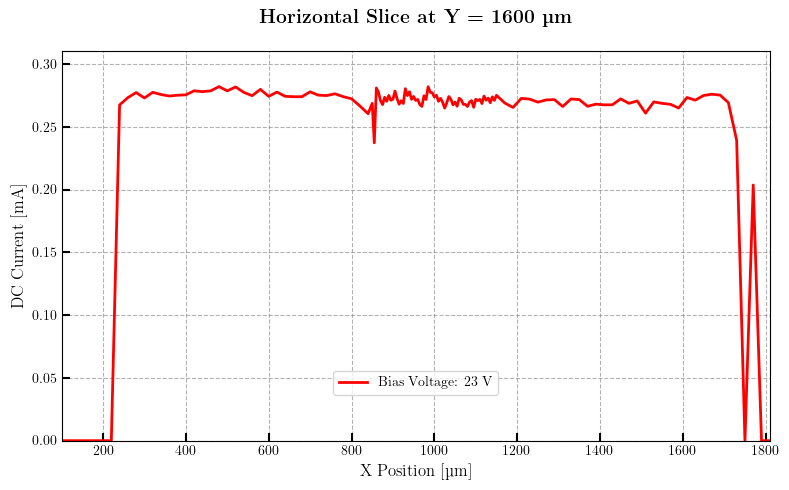

In [ ]:
# Print available Y-values
unique_y = np.unique(y_positions)
print("Available Y values:", unique_y)

# Set Y value closest to desired target
y_target =  1600 
tolerance = np.min(np.diff(unique_y)) * 0.5 if len(unique_y) > 1 else 1e-3  # Half-step tolerance

# Find closest Y-value instead of assuming exact match
y_closest = unique_y[np.argmin(np.abs(unique_y - y_target))]
print(f"Using closest Y = {y_closest}")

x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()

# Find indices where y ≈ y_closest
matching_indices = np.where(np.abs(y_positions_1D - y_closest) < tolerance)[0]

if matching_indices.size == 0:
    raise ValueError(f"No data found near y = {y_target}. Closest available: {y_closest}")

# Extract corresponding x-values and summed current for the slice
x_slice = x_positions_1D[matching_indices]
combined_current = (dccurr_A + dccurr_B + dccurr_C + dccurr_D).flatten()
current_slice = combined_current[matching_indices]

# Sort values for proper plotting
sorted_indices = np.argsort(x_slice)
x_slice_sorted = x_slice[sorted_indices]
current_slice_sorted = current_slice[sorted_indices]

# Extracting the bias voltage
bias_voltage = rawdata['smu00_bias_volt'][0]  # Extract the bias voltage value
bias_voltage_mean = np.mean(bias_voltage)  # Calculate the mean bias voltage

# Plot the horizontal slice
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']
slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)
plt.figure(figsize=(8, 5))
plt.plot(x_slice_sorted, current_slice_sorted, linestyle='-', color='red', linewidth=2,label=f'Bias Voltage: {int(bias_voltage_mean)} V')
plt.grid(True, linestyle='--', alpha=0.6, color='gray')
plt.xlabel(r"X Position [\textmu{}m]", fontsize=12, fontweight='bold')
plt.ylabel(r"DC Current [mA]", fontsize=12, fontweight='bold')
title = rf"\textbf{{Horizontal Slice at Y = {int(y_closest)} \textmu{{m}}}}"
plt.title(title, fontsize=14, fontweight='bold', pad=10)
plt.xlim([np.min(x_slice_sorted), np.max(x_slice_sorted)])
plt.ylim([0, np.max(current_slice_sorted) * 1.1])
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.legend(loc='lower center', fontsize=10, bbox_to_anchor=(0.5, 0.1), frameon=True)

filename = f"slice_at_Y_{y_closest}.png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")

plt.tight_layout()
plt.show()


### SLICING ALONG X

Available X values: [ 100.  120.  140.  160.  180.  200.  220.  240.  260.  280.  300.  320.
  340.  360.  380.  400.  420.  440.  460.  480.  500.  520.  540.  560.
  580.  600.  620.  640.  660.  680.  700.  720.  740.  760.  780.  800.
  820.  840.  850.  855.  860.  865.  870.  875.  880.  885.  890.  895.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
  960.  965.  970.  975.  980.  985.  990.  995. 1000. 1005. 1010. 1015.
 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055. 1060. 1065. 1070. 1075.
 1080. 1085. 1090. 1095. 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135.
 1140. 1145. 1150. 1170. 1190. 1210. 1230. 1250. 1270. 1290. 1310. 1330.
 1350. 1370. 1390. 1410. 1430. 1450. 1470. 1490. 1510. 1530. 1550. 1570.
 1590. 1610. 1630. 1650. 1670. 1690. 1710. 1730. 1750. 1770. 1790. 1810.]
Using closest X = 1000.0
Saved: /Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing/slice_at_X_1000.0.png


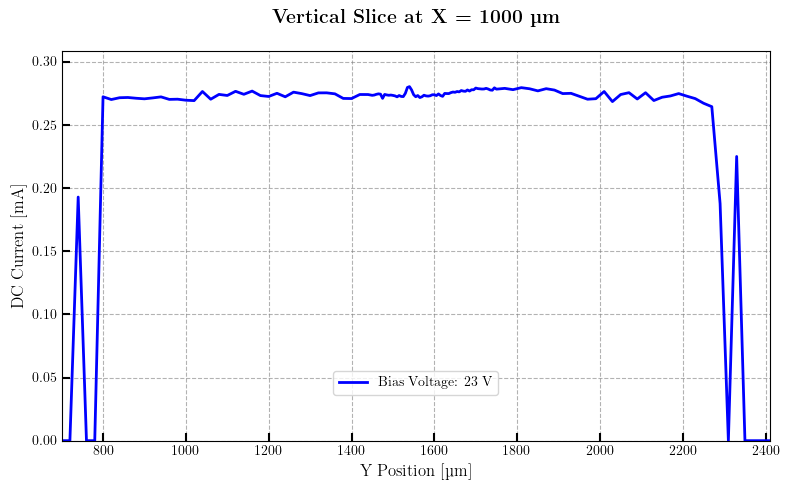

In [ ]:
unique_x = np.unique(x_positions)
print("Available X values:", unique_x)

# Set X value closest to desired target
x_target = 1000  
tolerance = np.min(np.diff(unique_x)) * 0.5 if len(unique_x) > 1 else 1e-3 
x_closest = unique_x[np.argmin(np.abs(unique_x - x_target))]
print(f"Using closest X = {x_closest}")
x_positions_1D = x_positions.flatten()
y_positions_1D = y_positions.flatten()
matching_indices = np.where(np.abs(x_positions_1D - x_closest) < tolerance)[0]

if matching_indices.size == 0:
    raise ValueError(f"No data found near x = {x_target}. Closest available: {x_closest}")

y_slice = y_positions_1D[matching_indices]
combined_current = (dccurr_A + dccurr_B + dccurr_C + dccurr_D).flatten()
current_slice = combined_current[matching_indices]
sorted_indices = np.argsort(y_slice)
y_slice_sorted = y_slice[sorted_indices]
current_slice_sorted = current_slice[sorted_indices]

# Extracting the bias voltage
bias_voltage = rawdata['smu00_bias_volt'][0]  
bias_voltage_mean = np.mean(bias_voltage) 

# Plot the vertical slice
slicing_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_011_CC/20240620/fig/slicing"
os.makedirs(slicing_dir, exist_ok=True)
plt.figure(figsize=(8, 5))
plt.plot(y_slice_sorted, current_slice_sorted, linestyle='-', color='blue', linewidth=2, label=f'Bias Voltage: {int(bias_voltage_mean)} V')
plt.grid(True, linestyle='--', alpha=0.6, color='gray')
plt.xlabel(r"Y Position [\textmu{}m]", fontsize=12, fontweight='bold')
plt.ylabel(r"DC Current [mA]", fontsize=12, fontweight='bold')
title = rf"\textbf{{Vertical Slice at X = {int(x_closest)} \textmu{{m}}}}"
plt.title(title, fontsize=14, fontweight='bold', pad=10)
plt.xlim([np.min(y_slice_sorted), np.max(y_slice_sorted)])
plt.ylim([0, np.max(current_slice_sorted) * 1.1]) 
plt.tick_params(axis='both', which='major', labelsize=10, length=6, width=1.5, direction='in')
plt.legend(loc='lower center', fontsize=10, bbox_to_anchor=(0.5, 0.1), frameon=True)

filename = f"slice_at_X_{x_closest}.png"
save_path = os.path.join(slicing_dir, filename)
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_path}")

plt.tight_layout()
plt.show()